# Лабораторная работа 4 <br>
# Модель YOLO для обнаружения объектов на изображениях

In [23]:
from google.colab import drive
import os
from ultralytics import YOLO

In [25]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Задание А


0: 640x640 2 cats, 2 dogs, 12.7ms
Speed: 4.4ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


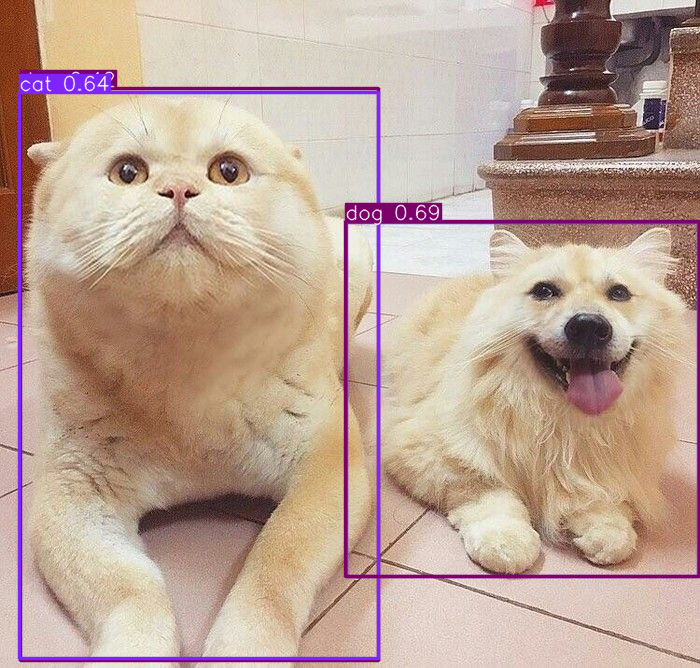

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [26]:
results = model(["/content/drive/My Drive/vagons_dataset/DOGCAT.jpg"])
result=results[0]
boxes = result.boxes
obb = result.obb
result.show()
print(model.names)
for box in boxes:
  print(result.names[box.cls.item()])
  print(round(box.conf.item(),2))
  print([round(el,2) for el in box.xyxy.tolist()[0]])

# Задание С

In [8]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/vagons_dataset"
os.chdir(path)
path_ = os.path.join(path, "data.yaml")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка и обучение обучение модели

In [6]:
results = model.train(data=path_, epochs=100, imgsz=640)

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/My Drive/vagons_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/My Drive/vagons_dataset/train/labels.cache... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/vagons_dataset/valid/labels.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.98G      1.544      2.344      1.662         81        640: 100%|██████████| 131/131 [12:22<00:00,  5.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        196        901      0.724      0.302      0.344      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.83G      1.506      1.799       1.62        118        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


                   all        196        901       0.38      0.456      0.377      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.83G      1.527      1.729      1.624         90        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]


                   all        196        901      0.391      0.439      0.372      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.76G      1.479      1.652      1.587        109        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        196        901      0.402      0.465      0.405      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.78G      1.465      1.579      1.566        108        640: 100%|██████████| 131/131 [01:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]


                   all        196        901      0.707      0.407      0.429       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.77G      1.442      1.526      1.552         82        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        196        901      0.454      0.488      0.435      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.78G      1.411      1.488      1.534        101        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


                   all        196        901      0.461      0.489      0.445      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.8G      1.376      1.443      1.502        105        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        196        901       0.48      0.471      0.452      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.77G      1.349      1.405      1.485        112        640: 100%|██████████| 131/131 [00:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


                   all        196        901      0.445      0.523      0.469      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.77G      1.344      1.391      1.482         89        640: 100%|██████████| 131/131 [01:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        196        901      0.457      0.515      0.459       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.8G      1.322      1.359      1.466        112        640: 100%|██████████| 131/131 [00:59<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        196        901      0.441      0.524      0.462      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.76G      1.303      1.338      1.449        108        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        196        901        0.5      0.494      0.464      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.77G      1.294      1.326      1.447        110        640: 100%|██████████| 131/131 [00:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


                   all        196        901      0.438      0.534      0.463      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.77G      1.281      1.299      1.426        105        640: 100%|██████████| 131/131 [00:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        196        901      0.475      0.546      0.473      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.8G      1.276      1.284      1.429         99        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        196        901      0.478      0.486      0.469      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.79G      1.267      1.289      1.428        120        640: 100%|██████████| 131/131 [01:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        196        901      0.496      0.519      0.471      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.8G      1.257      1.266      1.417        114        640: 100%|██████████| 131/131 [00:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        196        901      0.405      0.531      0.471      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.77G      1.234       1.24      1.401         99        640: 100%|██████████| 131/131 [00:59<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        196        901      0.525      0.476      0.466      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.79G      1.219      1.211      1.397         93        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        196        901      0.482      0.541      0.484      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.79G      1.229      1.233      1.395         96        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


                   all        196        901      0.545      0.496      0.484      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.77G       1.22      1.229      1.402        123        640: 100%|██████████| 131/131 [01:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        196        901      0.512      0.482      0.466      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.78G       1.21      1.187      1.383        113        640: 100%|██████████| 131/131 [01:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


                   all        196        901      0.461      0.549      0.485        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.78G      1.192       1.18      1.373        118        640: 100%|██████████| 131/131 [00:58<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        196        901      0.486      0.539       0.47      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.79G      1.186      1.159      1.364        120        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


                   all        196        901      0.458      0.512      0.472      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.77G      1.179       1.17      1.369         87        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


                   all        196        901      0.451      0.531      0.473      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.9G      1.169       1.14       1.35         80        640: 100%|██████████| 131/131 [00:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


                   all        196        901      0.469      0.537      0.469      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.81G      1.159      1.147      1.351        116        640: 100%|██████████| 131/131 [01:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        196        901      0.461      0.519      0.463      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.77G      1.155      1.129      1.336        131        640: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        196        901      0.438      0.494      0.457      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.82G       1.13      1.107       1.33         92        640: 100%|██████████| 131/131 [00:59<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        196        901      0.421       0.52      0.456       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.77G      1.143      1.098      1.334        116        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


                   all        196        901      0.499      0.498      0.477       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.82G      1.124      1.079      1.324         91        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        196        901      0.461      0.534      0.481        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.79G      1.119      1.077      1.323        107        640: 100%|██████████| 131/131 [00:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


                   all        196        901      0.486      0.488      0.473      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.87G      1.114      1.063      1.314        106        640: 100%|██████████| 131/131 [01:00<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


                   all        196        901       0.49      0.556      0.487      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.77G      1.118      1.062      1.313        106        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        196        901      0.451      0.544      0.468      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.77G      1.089      1.036      1.295         75        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]


                   all        196        901      0.443      0.536      0.452      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.76G      1.097      1.034      1.296        122        640: 100%|██████████| 131/131 [00:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        196        901      0.411        0.5      0.441      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.77G      1.087      1.035      1.298         98        640: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        196        901      0.479      0.522      0.465      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.8G      1.076      1.027      1.295        106        640: 100%|██████████| 131/131 [01:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        196        901      0.485      0.499      0.471      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.78G      1.077      1.013      1.287         86        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        196        901      0.459      0.522      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.83G      1.065      1.002      1.283         83        640: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        196        901      0.474      0.517      0.464      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.81G       1.07     0.9931      1.275        125        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        196        901      0.481       0.48      0.453      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.78G      1.054     0.9759      1.269        128        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        196        901      0.437      0.561      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.81G      1.046     0.9777      1.273        113        640: 100%|██████████| 131/131 [01:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        196        901      0.524      0.459      0.453      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.8G      1.048       0.97      1.267        121        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        196        901       0.47      0.512      0.477      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.85G       1.05     0.9716      1.278        109        640: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        196        901      0.486      0.519      0.484      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.8G      1.043     0.9656      1.267         92        640: 100%|██████████| 131/131 [00:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        196        901      0.492       0.48       0.46      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.81G      1.031     0.9409      1.261         98        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        196        901      0.444      0.532      0.445       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.76G       1.02     0.9304      1.253        118        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        196        901      0.446      0.537      0.455      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.81G      1.009     0.9147      1.239         92        640: 100%|██████████| 131/131 [01:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


                   all        196        901      0.466      0.501       0.45      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.81G      1.015     0.9242      1.241         74        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        196        901      0.495      0.464      0.459      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.87G     0.9918     0.8943      1.239        124        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


                   all        196        901      0.467       0.49      0.442      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.79G     0.9952      0.899      1.236         80        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        196        901      0.491      0.489      0.445      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.77G     0.9907     0.8998      1.229         99        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        196        901      0.463      0.539       0.46      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.77G     0.9827     0.8853      1.228        101        640: 100%|██████████| 131/131 [01:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        196        901      0.453      0.459      0.437      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.87G     0.9853     0.8748      1.231        107        640: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        196        901      0.516      0.487      0.469      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.86G     0.9689     0.8612       1.22        124        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        196        901       0.45      0.498      0.458      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.78G     0.9668     0.8598      1.218        126        640: 100%|██████████| 131/131 [00:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        196        901      0.516      0.441      0.449      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.77G     0.9792     0.8736      1.225        104        640: 100%|██████████| 131/131 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        196        901      0.481      0.498      0.461       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.81G      0.959     0.8422      1.213         92        640: 100%|██████████| 131/131 [00:59<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        196        901      0.446      0.526      0.458      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.81G     0.9638     0.8417      1.215        102        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        196        901      0.456      0.509      0.458      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.85G     0.9527     0.8309        1.2        110        640: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        196        901      0.478      0.521      0.465      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.85G     0.9407     0.8242      1.198         90        640: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        196        901      0.438       0.52      0.451      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.8G     0.9421     0.8183      1.194        134        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        196        901      0.485      0.471      0.448      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.76G     0.9313     0.8143       1.19        127        640: 100%|██████████| 131/131 [01:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        196        901      0.501      0.503      0.467      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.77G     0.9324     0.8051      1.192        111        640: 100%|██████████| 131/131 [00:56<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        196        901      0.446      0.535      0.452      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.85G       0.93     0.8085      1.194        102        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        196        901      0.479      0.474       0.44      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.77G     0.9145     0.7903      1.177         92        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


                   all        196        901      0.456      0.516      0.462      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.8G     0.9284     0.8079      1.195        100        640: 100%|██████████| 131/131 [00:58<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        196        901      0.534      0.454      0.465      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.79G     0.9059     0.7657      1.168        113        640: 100%|██████████| 131/131 [01:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        196        901      0.482      0.498      0.456      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.84G      0.917     0.7943      1.188         68        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        196        901      0.483       0.49      0.447      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.89G      0.888     0.7596      1.162         99        640: 100%|██████████| 131/131 [00:58<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


                   all        196        901      0.443      0.501      0.446      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.76G     0.8968      0.763       1.17        121        640: 100%|██████████| 131/131 [00:58<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        196        901      0.524      0.468      0.456      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.77G     0.8926     0.7556      1.159         98        640: 100%|██████████| 131/131 [00:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        196        901      0.459      0.492       0.44      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.78G     0.8885     0.7559      1.162        111        640: 100%|██████████| 131/131 [01:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        196        901      0.478      0.504      0.458      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.82G      0.879     0.7477      1.155         91        640: 100%|██████████| 131/131 [00:57<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        196        901      0.482      0.482      0.442      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.83G     0.8832     0.7388      1.155        119        640: 100%|██████████| 131/131 [00:57<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        196        901       0.47      0.488      0.457      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.86G     0.8818     0.7389      1.159         96        640: 100%|██████████| 131/131 [00:57<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


                   all        196        901      0.534      0.423      0.446      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.79G     0.8639     0.7334      1.158         94        640: 100%|██████████| 131/131 [00:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        196        901      0.507      0.487      0.457      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.82G     0.8747     0.7304      1.149        115        640: 100%|██████████| 131/131 [01:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        196        901      0.472      0.505      0.455      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.76G     0.8522     0.7247      1.142         88        640: 100%|██████████| 131/131 [01:00<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        196        901      0.491      0.499      0.452      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.79G     0.8599     0.7212      1.146         93        640: 100%|██████████| 131/131 [01:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        196        901      0.481      0.485       0.45      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.79G     0.8374     0.6988      1.131         87        640: 100%|██████████| 131/131 [01:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        196        901      0.527       0.44      0.447      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.77G     0.8314     0.6973      1.129        105        640: 100%|██████████| 131/131 [01:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        196        901      0.483      0.502      0.449      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.79G     0.8437     0.6982      1.133         87        640: 100%|██████████| 131/131 [01:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        196        901      0.507      0.473      0.455      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.77G     0.8399     0.6978      1.134        104        640: 100%|██████████| 131/131 [01:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        196        901      0.496      0.495      0.446      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.81G     0.8336     0.6906      1.128         80        640: 100%|██████████| 131/131 [01:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        196        901      0.473      0.488      0.442      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.82G     0.8315     0.6833      1.126        114        640: 100%|██████████| 131/131 [01:00<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        196        901      0.486      0.481      0.444      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.76G     0.8161     0.6792      1.115         89        640: 100%|██████████| 131/131 [01:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


                   all        196        901       0.47      0.496      0.447      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.8G     0.8034     0.6751      1.114         93        640: 100%|██████████| 131/131 [00:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        196        901      0.496      0.495      0.447       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.77G     0.8137     0.6725      1.123         91        640: 100%|██████████| 131/131 [00:59<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        196        901      0.499      0.488      0.444      0.281


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.89G      0.788     0.5911      1.104         56        640: 100%|██████████| 131/131 [00:59<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


                   all        196        901       0.44      0.528       0.44      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.76G     0.7706     0.5681      1.091         48        640: 100%|██████████| 131/131 [00:56<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        196        901      0.513      0.463      0.441      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.75G     0.7592     0.5569      1.086         52        640: 100%|██████████| 131/131 [00:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        196        901      0.493      0.499      0.441      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.75G     0.7496     0.5489      1.075         57        640: 100%|██████████| 131/131 [00:55<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        196        901      0.499      0.487      0.439      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.74G     0.7436     0.5358      1.072         46        640: 100%|██████████| 131/131 [00:55<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        196        901      0.487      0.497      0.442      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.75G     0.7431     0.5481      1.075         55        640: 100%|██████████| 131/131 [00:55<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        196        901      0.465      0.512      0.442      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.75G     0.7316     0.5273      1.066         53        640: 100%|██████████| 131/131 [00:56<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        196        901      0.482      0.507      0.439      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.75G     0.7283     0.5293       1.07         66        640: 100%|██████████| 131/131 [00:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        196        901      0.481      0.474      0.435      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.77G     0.7257     0.5266      1.065         55        640: 100%|██████████| 131/131 [00:55<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        196        901      0.484      0.483      0.436      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.73G     0.7171     0.5176      1.053         47        640: 100%|██████████| 131/131 [00:56<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        196        901      0.502       0.46      0.439      0.282



100 epochs completed in 1.956 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]


                   all        196        901      0.486      0.518      0.484      0.307
                  body        194        324      0.742      0.849      0.867      0.611
              coupling         92        110      0.243      0.205      0.184     0.0997
                wheels        194        467      0.472      0.501      0.401      0.211
Speed: 0.6ms preprocess, 4.3ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train6


График изменения точности модели на валидационной выборке в зависимости от эпохи обучения

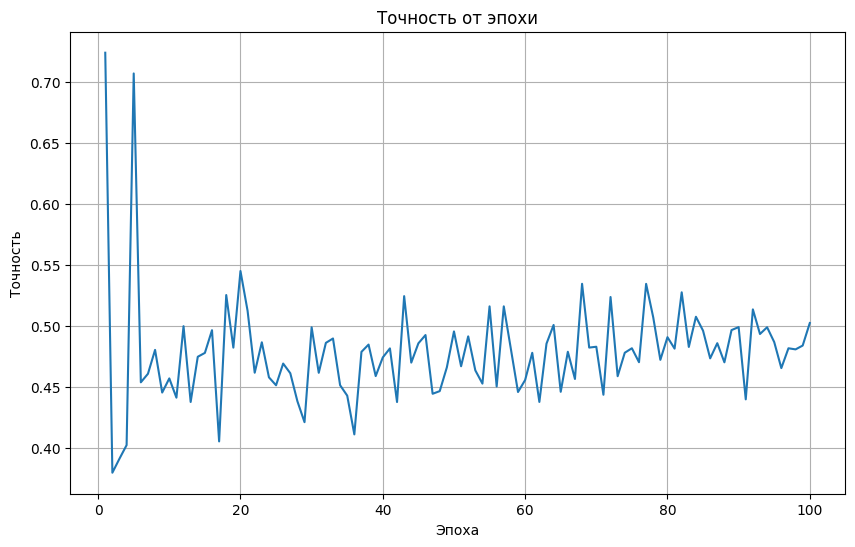

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/content/drive/My Drive/vagons_dataset/runs/detect/train6/results.csv', sep=',')
df = df.rename(columns=lambda x: x.strip())

epoch = [i for i in range(1, 101)]
pre = df['metrics/precision(B)']

plt.figure(figsize=(10, 6))
plt.plot(epoch, pre)

plt.title('Точность от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)

plt.show()


Лучшую модель, полученную в рамках обучения

In [15]:
best = YOLO('/content/drive/My Drive/vagons_dataset/runs/detect/train6/weights/best.pt')

In [16]:
best.names

{0: 'body', 1: 'coupling', 2: 'wheels'}

Предсказание для набора из 5
изображений, для каждого из них графический результат
(аналогично последнему пункту задания а)

/content/drive/My Drive/vagons_dataset/train/images/vagon_0501a_jpg.rf.9a274fcfb96c01f692716e9c38a72352.jpg

0: 640x640 1 body, 1 wheels, 21.4ms
Speed: 2.3ms preprocess, 21.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


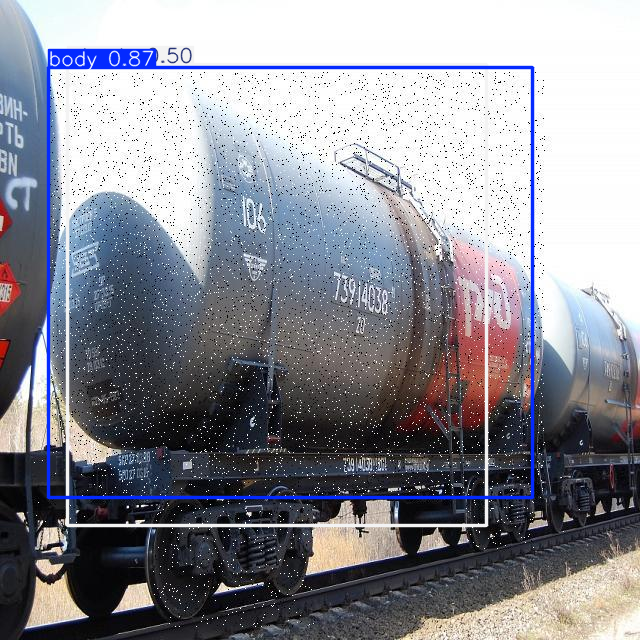

/content/drive/My Drive/vagons_dataset/train/images/news_2-width-1140_jpg.rf.0f6040979f7fada660a9317fa25b2d17.jpg

0: 640x640 4 bodys, 6 wheelss, 17.7ms
Speed: 2.6ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


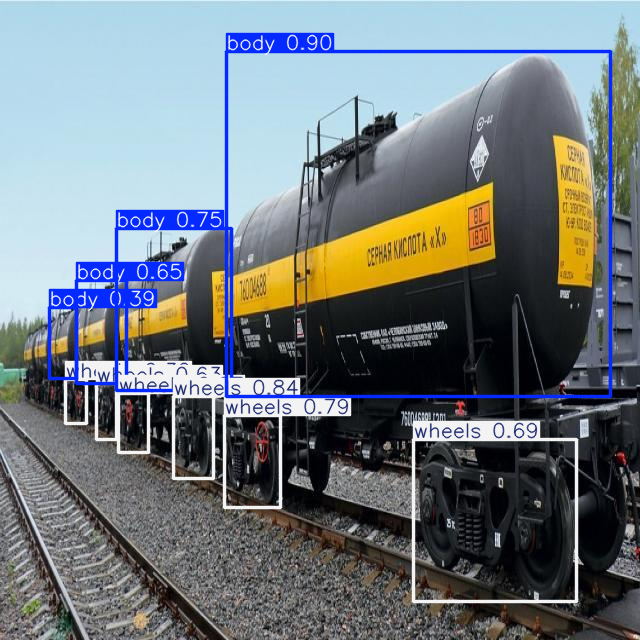

/content/drive/My Drive/vagons_dataset/train/images/61629622_jpg.rf.eb8402f394c64918aa3cbe7fff0f622e.jpg

0: 640x640 1 body, 2 couplings, 3 wheelss, 13.8ms
Speed: 2.2ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


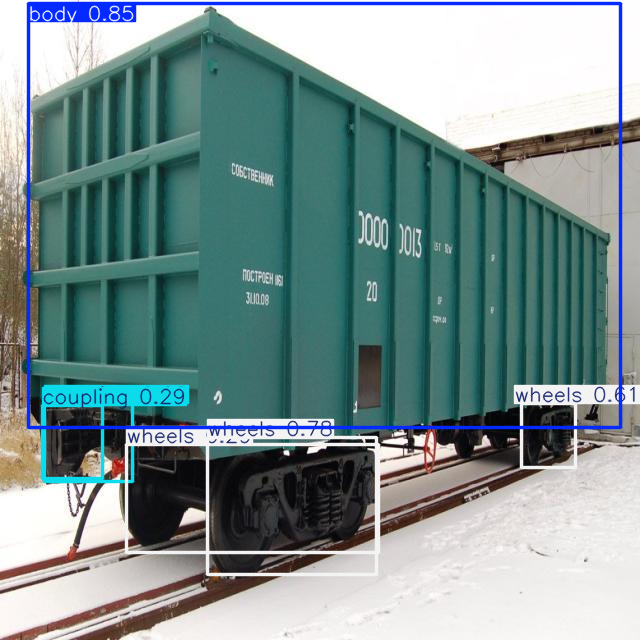

/content/drive/My Drive/vagons_dataset/train/images/35041_jpg.rf.07b0c619b486a010c1a73890056d6010.jpg

0: 640x640 1 body, 1 coupling, 2 wheelss, 15.7ms
Speed: 2.1ms preprocess, 15.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


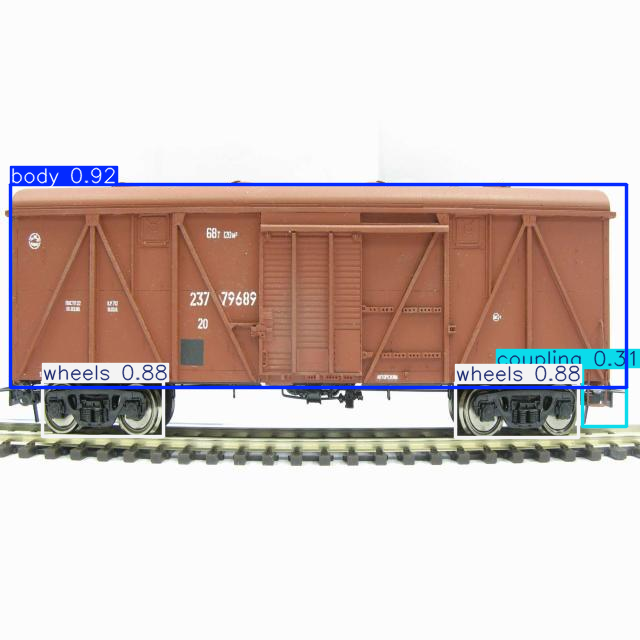

/content/drive/My Drive/vagons_dataset/train/images/423bc_jpeg_jpg.rf.fa76fd2d5fa32ed15030668500bda4f6.jpg

0: 640x640 9 bodys, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


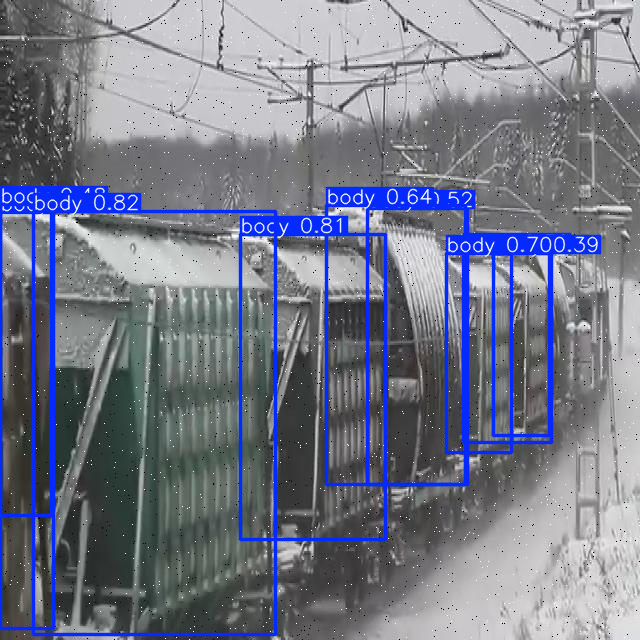

In [22]:
from random import shuffle
from glob import glob

files = glob(r"/content/drive/My Drive/vagons_dataset/train/images/*.jpg")
shuffle(files)
files_ = files[:5]
for file in files_:
    print(file)
    result_ = best([f"{file}"])
    if result_:
        result_ = result_[0]
        boxes = result_.boxes
        obb = result_.obb
        result_.show()